# EDA - ANÁLISIS EXPLORATORIO DE DATOS DE VENTAS ONLINE DE UNA EMPRESA EN ESTADOS UNIDOS

## 1. INTRODUCCIÓN

## 2. OBJETIVO

## 3. HIPÓTESIS

## 4. IMPORTACIÓN DE LIBRERÍAS

Importo las librerías que serán usadas en el presente notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 5. IMPORTACIÓN DE DATASETS

Respecto a los Datasets, usaré **2** archivos *.csv*. 
- ***Online_Sales_USA.csv*** = Es el DataFrame principal.
- ***Cost_Of_Living_USA.csv*** = Es el DataFrame secundario, de donde se extraerá solo una variable para analizar con el principal.

In [5]:
df_original = pd.read_csv('./data/1.raw/Online_Sales_USA.csv')

C:\Users\Ximena\AppData\Local\Temp\ipykernel_9728\3037454922.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('./data/1.raw/Online_Sales_USA.csv')


## 6. ANÁLISIS GENERAL DE DATOS

Se realiza un `.head()` para obtener una visión general respecto a las primeras filas del DataFrame y las etiquetas de las columnas. 

In [6]:
df_original.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


Con `.info()` obtenemos información general del conjunto de datos, como por ejemplo, cantidad de columnas y filas, el tipo de dato según los valores de cada columna, la cantidad de datos no nulos, etc. 

In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

Realizo un `.describe()` para obtener un breve análisis estadístico de las variables númericas: 

In [8]:
df_original.describe()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079
std,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100
min,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000
50%,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000
75%,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000
max,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000


Análisis estadístico de variables no numéricas:

In [9]:
df_original.describe(include=object)

,order_id,order_date,status,sku,category,payment_method,bi_st,month,Name Prefix,First Name,...,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Region,User Name
count,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392,...,286392,286392,286392,286392,286392,286392,286392,286392,286392,286392
unique,201716,365,13,47932,15,13,3,12,7,5161,...,64246,11647,64146,64248,15892,2551,15892,51,4,64006
top,100476608,2020-12-20,canceled,MATSAM59DB75ADB2F80,Mobiles & Tablets,cod,Gross,Dec-2020,Mr.,Joel,...,joel.gonzalez@yahoo.com,11/30/2005,668-48-2887,217-861-7640,Dekalb,Jefferson,Dekalb,TX,South,jugonzalez
freq,43,13678,112166,3775,61761,102916,112333,82528,103506,2895,...,2524,2536,2524,2524,2525,3510,2525,17510,103482,2524


Seguidamente obtenemos la dimensión del DataFrame con `.shape()`, lo cual devuelve la cantidad de filas y columnas.

In [11]:
df_original.shape

(286392, 36)

Realizo un `isnull()` + `sum()` para verificar si tengo datos nulos, y la cantidad de los mismos. 

In [12]:
df_original.isnull().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

Además, se verifica si hay entradas ducplicadas:

In [13]:
df_original.duplicated().sum()

0

Y por último, realizo un `.nunique()` para observar la cantidad de valores únicos que existen por columna. 

In [14]:
df_original.nunique()

order_id            201716
order_date             365
status                  13
item_id             286392
sku                  47932
qty_ordered             72
price                 7561
value                10814
discount_amount      14577
total                24451
category                15
payment_method          13
bi_st                    3
cust_id              64248
year                     2
month                   12
ref_num              62065
Name Prefix              7
First Name            5161
Middle Initial          26
Last Name            18208
Gender                   2
age                     58
full_name            64212
E Mail               64246
Customer Since       11647
SSN                  64146
Phone No.            64248
Place Name           15892
County                2551
City                 15892
State                   51
Zip                  33773
Region                   4
User Name            64006
Discount_Percent     17133
dtype: int64

## 7. LIMPIEZA DE DATOS 

Procederé a realizar la limpieza del conjunto de datos, como por ejemplo, eliminar columnas que son irrelevantes para el análisis, modificar etiquetas de columnas para que unificar todo al idioma español, convertir la columna donde constan las fechas de pedidos en el índice y demás.

> #### **7.1. COPIA DEL CONJUNTO DE DATOS ANTES DE LA LIMPIEZA**

Realizo por cuestiones de seguridad una copia de mi archivo de ventas antes de la limpieza.

In [15]:
df_original_copia = df_original.copy()

In [16]:
df_original_copia.to_csv('./data/1.raw/copia_Online_Sales_USA')

> #### **7.2. ELIMINACIÓN DE COLUMNAS**

Luego de un análisis en relación a mis hipótesis y al conjunto datos, procedo a eliminar las columnas que no son relevantes para realizar el EDA. <br>
La razón por la cual se elimina cada columna se encuentra detallada en la [Memoria](MEMORIA.ipynb) del presente EDA. 

In [25]:
columnas_a_eliminar = ['order_id', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'discount_amount', 'total', 'payment_method', 'bi_st', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'full_name', 'E Mail', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'Zip', 'year', 'month', 'User Name', 'Gender', 'Customer Since',
       'Discount_Percent']

len(columnas_a_eliminar) # Corroboro que sea la cantidad exacta de columnas a eliminar

28

In [26]:
df_ventas_online = df_original.drop(columns=columnas_a_eliminar)

Por último, verifico que hayan quedado las columnas que son importantes para mi EDA.

In [27]:
df_ventas_online.columns

Index(['order_date', 'value', 'category', 'cust_id', 'age', 'City', 'State',
       'Region'],
      dtype='object')

> #### **7.3. TRADUCCIONES**

Realizaré la traducción de las etiquetas de las columnas, de los valores contenidos en la variable 'categoria'y 'region', todo ello para que haya un idioma uniforme en todo el análisis.

In [28]:
# A. TRADUCCIÓN COLUMNAS
traduccion_columnas = {
    'order_date': 'fecha_de_pedido',
    'value': 'valor',
    'category': 'categoria',
    'cust_id': 'ID_cliente',
    'age': 'edad',
    'City': 'ciudad',
    'State': 'estado',
    'Region': 'region'
}
    
df_ventas_online = df_ventas_online.rename(columns= traduccion_columnas)

In [29]:
# B. TRADUCCIÓN CATEGORÍAS
traduccion_categorias = {
    "Men's Fashion": 'Moda Hombres',
    'Mobiles & Tablets': 'Móviles y Tablets',
    'Computing': 'Computadoras',
    'Appliances': 'Electrodomésticos',
    'Home & Living': 'Hogar y Decoración',
    "Women's Fashion": 'Moda Mujeres',
    'Health & Sports': 'Salud y Deportes',
    'Beauty & Grooming': 'Belleza y Cuidado Personal',
    'Superstore': 'Supermercado',
    'Others': 'Otros',
    'Entertainment': 'Entretenimiento',
    'Soghaat': 'Artículos de Regalo',
    'Kids & Baby': 'Niños y Bebés',
    'Books': 'Libros',
    'School & Education': 'Escuela y Educación'
}

df_ventas_online['categoria'] = df_ventas_online['categoria'].replace(traduccion_categorias)

In [30]:
# C. TRADUCCIÓN REGIONES
traduccion_regiones = {
    'South': 'Sur',
    'Midwest': 'Medio Oeste',
    'West': 'Oeste',
    'Northeast': 'Noreste'
}

df_ventas_online['region'] = df_ventas_online['region'].replace(traduccion_regiones)

> #### **7.4. CONVERSIÓN DE COLUMNA A ÍNDICE EN FORMATO DATETIME**

Para poder analizar datos relacionados con la variable que contiene las fechas, convertiré la columna 'fecha_de_pedido' en índice, y a su vez en formato datetime.

In [33]:
df_ventas_online = df_ventas_online.set_index('fecha_de_pedido')

In [35]:
df_ventas_online.index = pd.to_datetime(df_ventas_online.index)

> #### **7.5. ACTUALIZACIÓN CONJUNTO DE DATOS**

Luego de realizar la limpieza, guardo en un nuevo archivo *csv* lo que será el DataFrame principal del EDA.

In [36]:
df_ventas_online.to_csv('./data/2.processed/df_ventas_online.csv')

## 8. ANÁLISIS EXPLORATORIO DE DATOS

### 8.1 ANÁLISIS CATEGORÍAS


#### 8.1.1 DISTRIBUCIÓN DE VENTAS POR CATEGORÍAS DE PRODUCTOS

1. Primero quiero averiguar cuántos valores únicos existen en la variable 'categoria' y cuáles son. Seguidamente, realizo un gráfico de barras con `countplot` de la librería 'Seaborn', para observar como se distribuyen las ventas por las 15 categorías existentes. 

In [40]:
df_ventas_online['categoria'].nunique()

15

In [39]:
df_ventas_online['categoria'].unique()

array(['Moda Hombres', 'Móviles y Tablets', 'Computadoras',
       'Electrodomésticos', 'Hogar y Decoración', 'Moda Mujeres',
       'Salud y Deportes', 'Belleza y Cuidado Personal', 'Supermercado',
       'Otros', 'Entretenimiento', 'Artículos de Regalo', 'Niños y Bebés',
       'Libros', 'Escuela y Educación'], dtype=object)

C:\Users\Ximena\AppData\Local\Temp\ipykernel_9728\4053160071.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='categoria', data=df_ventas_online, order=df_ventas_online['categoria'].value_counts().index, palette=palette)


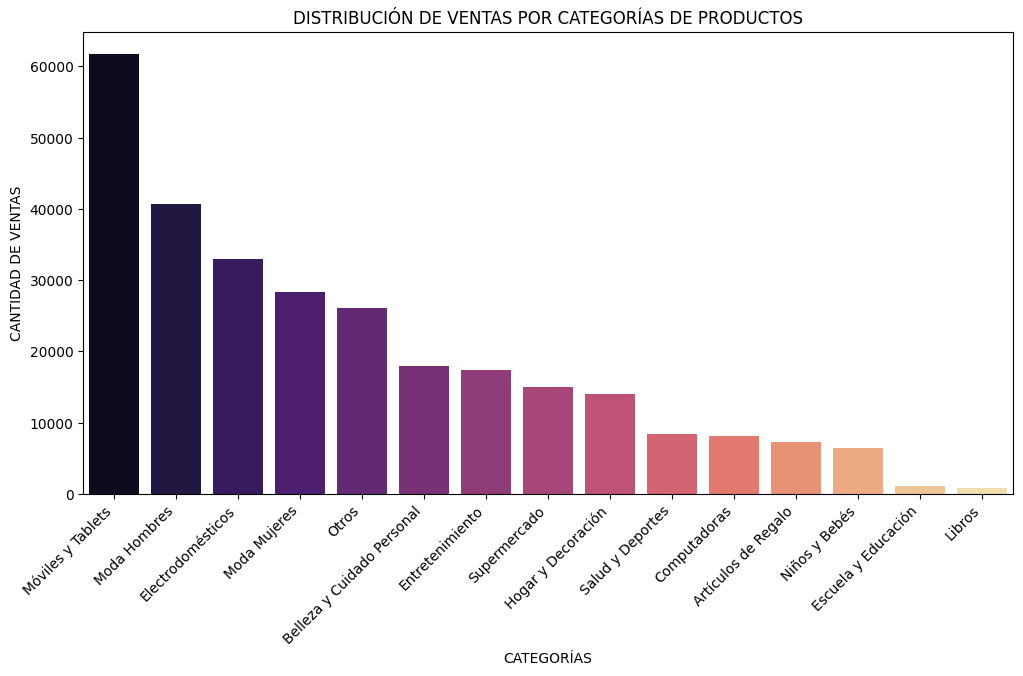

In [38]:
palette = sns.color_palette('magma', n_colors=15)

plt.figure(figsize=(12, 6))
sns.countplot(x='categoria', data=df_ventas_online, order=df_ventas_online['categoria'].value_counts().index, palette=palette)
plt.title('DISTRIBUCIÓN DE VENTAS POR CATEGORÍAS DE PRODUCTOS')
plt.xlabel('CATEGORÍAS')
plt.ylabel('CANTIDAD DE VENTAS')
plt.xticks(rotation=45, ha='right')
plt.show();

2. A continuación, agrupo las categorías en un DataFrame y realizo un conteo de ventas sobre las mismas, para obtener detalladamente los números de ventas por cada categoría. 

In [44]:
df_agrupado_categorias = df_ventas_online.groupby('categoria')['valor'].count().reset_index(name='numero_de_ventas')
df_agrupado_categorias.sort_values(by='numero_de_ventas', ascending=False).reset_index().drop(columns='index')

,categoria,numero_de_ventas
0,Móviles y Tablets,61761
1,Moda Hombres,40713
2,Electrodomésticos,33034
3,Moda Mujeres,28334
4,Otros,26108
5,Belleza y Cuidado Personal,17899
6,Entretenimiento,17352
7,Supermercado,15024
8,Hogar y Decoración,13990
9,Salud y Deportes,8421


#### ***HIGHLIGHTS SOBRE CATEGORÍAS:***

**Categorías con mayor cantidad de ventas**: 
1. Móviles y Tablets = 61761 ventas.
2. Moda Hombres = 40713 ventas.
3. Electrodomésticos = 33034 ventas.

**Categorías con menor cantidad de ventas**: 
- Niños y Bebés	= 6492
- Escuela y Educación = 1090
- Libros = 814

Text(0.5, 1.0, 'Boxplot de Número de Ventas')

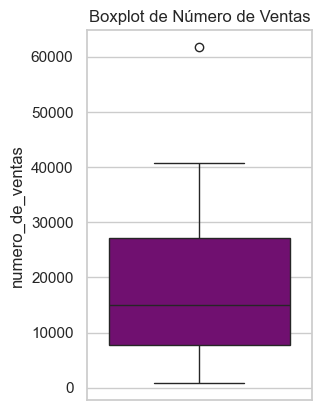

In [78]:
plt.subplot(1, 2, 2)
sns.boxplot(y='numero_de_ventas', data=df_agrupado_categorias, color='purple')
plt.title('Boxplot de Número de Ventas')

4. Histograma para observar la distribución de las ventas por categorías.

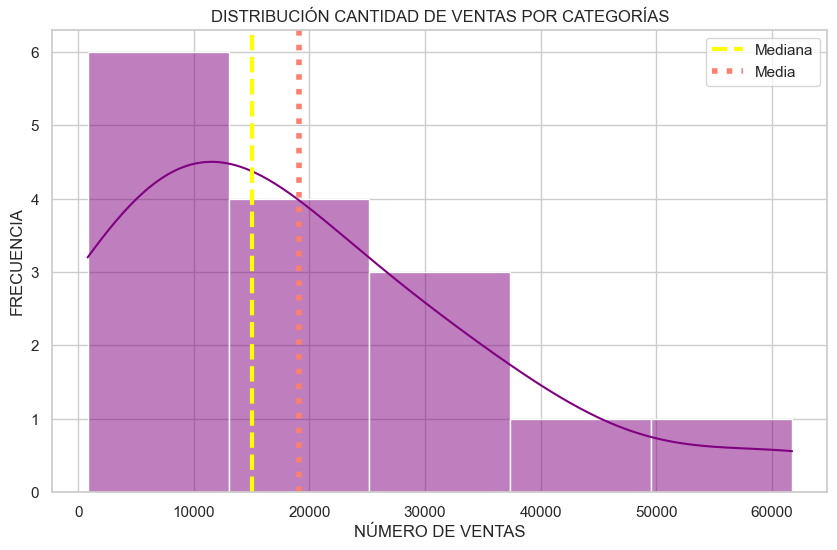

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df_agrupado_categorias['numero_de_ventas'], bins=5, kde=True, color='purple')

# Calculo la mediana y la media
mediana_ventas = df_agrupado_categorias['numero_de_ventas'].median()
media_ventas = df_agrupado_categorias['numero_de_ventas'].mean()

# Líneas verticales para la mediana y la media
plt.axvline(mediana_ventas, color='yellow', linestyle='dashed', linewidth=3, label='Mediana')
plt.axvline(media_ventas, color='salmon', linestyle='dotted', linewidth=4, label='Media')

# Título y etiquetas
plt.title('DISTRIBUCIÓN CANTIDAD DE VENTAS POR CATEGORÍAS')
plt.xlabel('NÚMERO DE VENTAS')
plt.ylabel('FRECUENCIA')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Se puede observar en el histograma una **distribución asimétrica positiva** de las ventas por categorías. 
Claramente hay algunos valores extremadamente altos que desvían la media hacia la derecha de la mediana, y conforme se pudo ver en el gráfico ut supra, contamos con la presencia de un 'outlier' respecto al resto de las categorías, el cual es, la elevada cantidad de ventas de 'Móviles y Tablets'.

#### 8.1.2 INGRESOS OBTENIDOS POR CATEGORÍAS DE PRODUCTOS

Al igual que analizamos la cantidad de ventas en relación a cada categoría, se analizará los ingresos obtenidos por cada una de ellas. 

In [67]:
df_categorias_valor = df_ventas_online.groupby('categoria')[['valor']].sum().reset_index()
df_categorias_valor

,categoria,valor
0,Artículos de Regalo,6.223453e+05
1,Belleza y Cuidado Personal,2.890640e+06
2,Computadoras,1.035744e+07
3,Electrodomésticos,3.344141e+07
4,Entretenimiento,3.042948e+07
5,Escuela y Educación,1.204539e+05
6,Hogar y Decoración,1.918317e+06
7,Libros,3.303033e+04
8,Moda Hombres,5.163376e+06
9,Moda Mujeres,7.359614e+06


Text(0.5, 1.0, 'Boxplot de Ingresos')

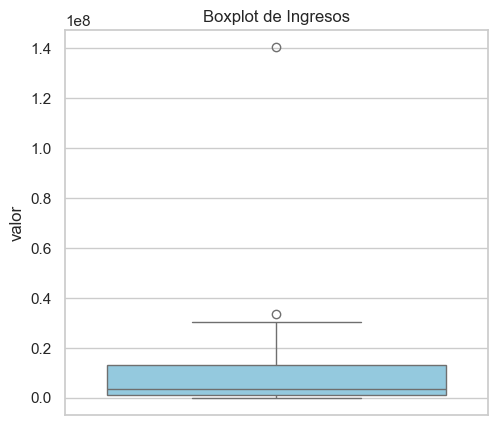

In [77]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='valor', data=df_categorias_valor, color='skyblue')
plt.title('Boxplot de Ingresos')

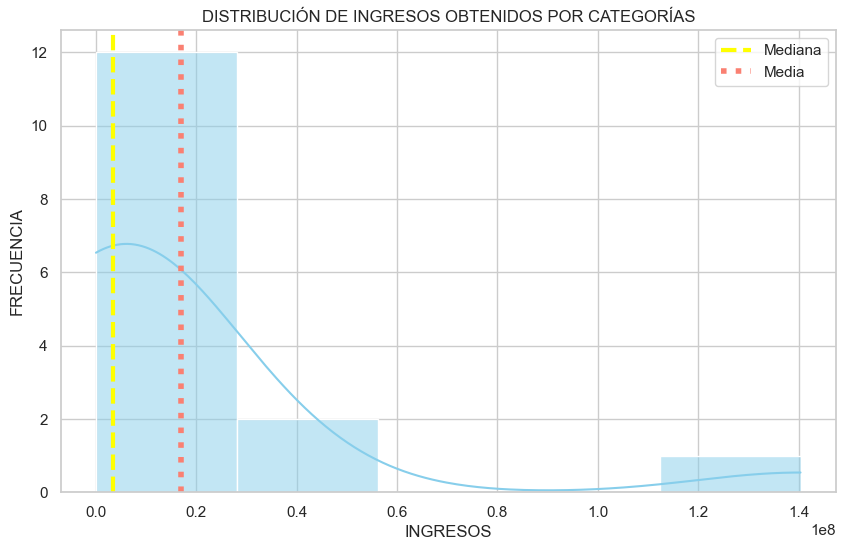

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(df_categorias_valor['valor'], bins=5, kde=True, color='skyblue')

# Calculo la mediana y la media
mediana_valor = df_categorias_valor['valor'].median()
media_valor = df_categorias_valor['valor'].mean()

# Líneas verticales para la mediana y la media
plt.axvline(mediana_valor, color='yellow', linestyle='dashed', linewidth=3, label='Mediana')
plt.axvline(media_valor, color='salmon', linestyle='dotted', linewidth=4, label='Media')

# Título y etiquetas
plt.title('DISTRIBUCIÓN DE INGRESOS OBTENIDOS POR CATEGORÍAS')
plt.xlabel('INGRESOS')
plt.ylabel('FRECUENCIA')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Se puede observar lo mismo que sucedía con las ventas y hasta en mayor volumen, que hay una **distribución asimétrica positiva** de los ingresos obtenidos por categorías. 
Claramente en la cola hacia la derecha se encuentra el valor más alto obtenido por la gran cantidad de ventas en 'Móviles y Tablets'.
 que desvían la media hacia la derecha de la mediana, y conforme se pudo ver en el gráfico ut supra, contamos con la presencia de un 'outlier' respecto al resto de las categorías, el cual es, la elevada cantidad de ventas de 'Móviles y Tablets'.